# Import Modules

In [1]:
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

In [3]:
 from google.colab import drive

 drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading Random 10 Photos

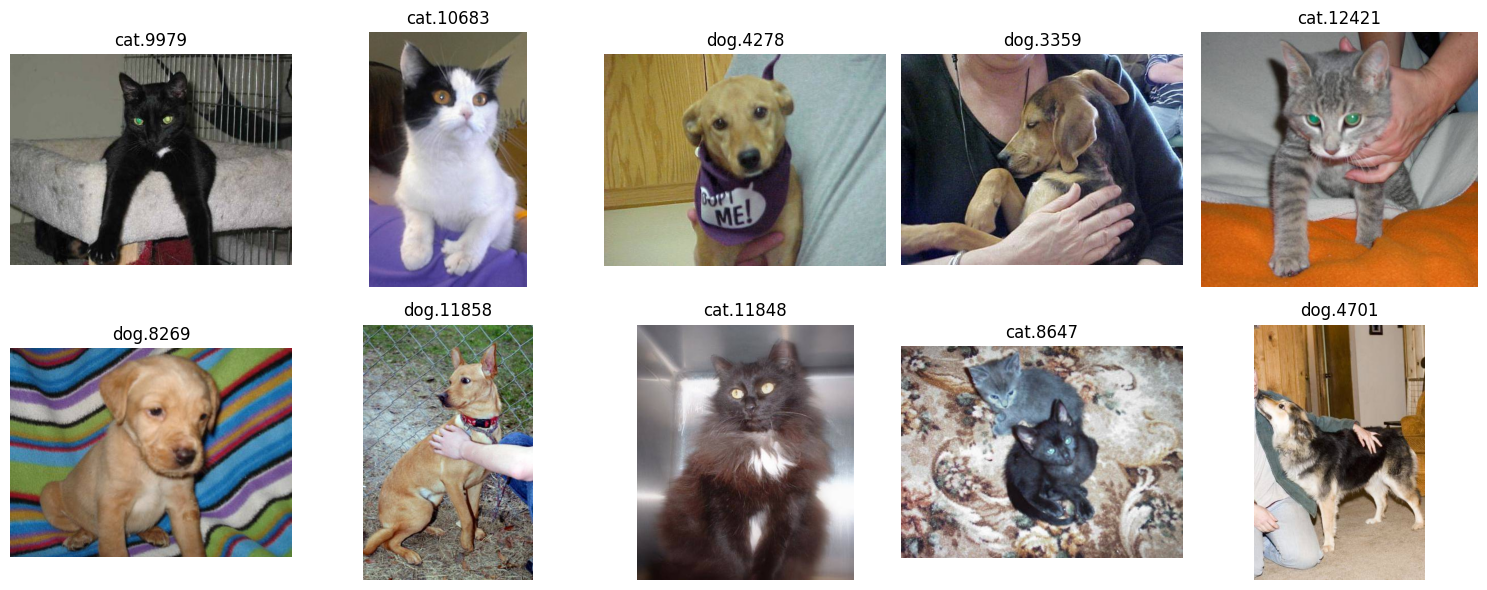

In [ ]:
import random
from pathlib import Path

data_folder = Path("original_data/data")
image_paths = []

# Gather all image paths from the data folder
for filename in os.listdir(data_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # image files (mixed types)
        image_paths.append(data_folder / filename)  # Append the photo path to the list


if len(image_paths) < 10:
    raise ValueError("Not enough images to sample 10 random images.")

random_images = random.sample(image_paths, 10)  # sample 10 random images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

for i, image_path in enumerate(random_images):
    image = load_img(image_path)
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.axis('off')
    label = image_path.stem
    ax.set_title(label)

plt.tight_layout()
plt.show()

# Changing Folder's structure

In [ ]:
folder_structure = {
    "experiment_small_data" : ['train' , 'val' , 'test'],
    "experiment_tiny_data" : ['train' , 'val' , 'test'],
}
# making the directories for the tiny and small data
for parent, sub_folders in folder_structure.items() :
    for sub_folder in sub_folders :
        if not os.path.exists(parent):
            path = os.path.join(parent , sub_folder)
            os.mkdir(path)


# Splitting the data structures up

In [ ]:
import shutil
from pathlib import Path


source_folder = "original_data/data"

destination_folders_small = {
    "train": "experiment_small_data/train",
    "val": "experiment_small_data/val",
    "test": "experiment_small_data/test"
}
destination_folders_tiny = {
    "train": "experiment_tiny_data/train",
    "val": "experiment_tiny_data/val",
    "test": "experiment_tiny_data/test"
}
desired_counts_small = {
    "train": 1600,
    "val": 400,
    "test": 500
}
desired_counts_tiny = {
    "train": 160,
    "val": 40,
    "test": 50
}

def move_and_randomize_images(source_folder, destination_folder, desired_count):
    for class_name in ["cat", "dog"]:
        class_folder = Path(destination_folder) / class_name
        os.makedirs(class_folder, exist_ok=True)

    copied_count = {"cat": 0, "dog": 0}
    all_images = list(Path(source_folder).glob("*.jpg"))

    if not all_images:
        print("No images found in the source folder.")
        return

    while copied_count["cat"] < desired_count or copied_count["dog"] < desired_count:
        selected_image = random.choice(all_images)
        class_name = "cat" if "cat" in selected_image.name.lower() else "dog"

        if copied_count[class_name] >= desired_count:
            continue

        try:
            shutil.move(str(selected_image), str(Path(destination_folder) / class_name / selected_image.name))
        except FileNotFoundError as e:
            print(f"Failed to move {selected_image}: {e}")
        copied_count[class_name] += 1


for folder_name, destination_folder in destination_folders_small.items():
    desired_count = desired_counts_small[folder_name]
    move_and_randomize_images(source_folder, destination_folder, desired_count)

for folder_name, destination_folder in destination_folders_tiny.items():
    desired_count = desired_counts_tiny[folder_name]
    move_and_randomize_images(source_folder, destination_folder, desired_count)


Failed to move original_data\data\dog.10435.jpg: [Errno 2] No such file or directory: 'original_data\\data\\dog.10435.jpg'
Failed to move original_data\data\dog.1637.jpg: [Errno 2] No such file or directory: 'original_data\\data\\dog.1637.jpg'
Failed to move original_data\data\dog.4813.jpg: [Errno 2] No such file or directory: 'original_data\\data\\dog.4813.jpg'
Failed to move original_data\data\dog.11092.jpg: [Errno 2] No such file or directory: 'original_data\\data\\dog.11092.jpg'
Failed to move original_data\data\cat.6904.jpg: [Errno 2] No such file or directory: 'original_data\\data\\cat.6904.jpg'
Failed to move original_data\data\cat.9993.jpg: [Errno 2] No such file or directory: 'original_data\\data\\cat.9993.jpg'
Failed to move original_data\data\cat.4127.jpg: [Errno 2] No such file or directory: 'original_data\\data\\cat.4127.jpg'
Failed to move original_data\data\cat.3237.jpg: [Errno 2] No such file or directory: 'original_data\\data\\cat.3237.jpg'
Failed to move original_data

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


datapath = Path().absolute().parent / "original_data/data"
images = [plt.imread(path) for path in datapath.glob("*.jpg")]

len(images)

0

# Seeing if the data got split evenly or not and taking it to prevent overfitting

Heights: [374, 314, 331, 374, 374, 374, 442, 273, 374, 336]
Widths: [349, 210, 499, 500, 500, 500, 499, 297, 500, 423]


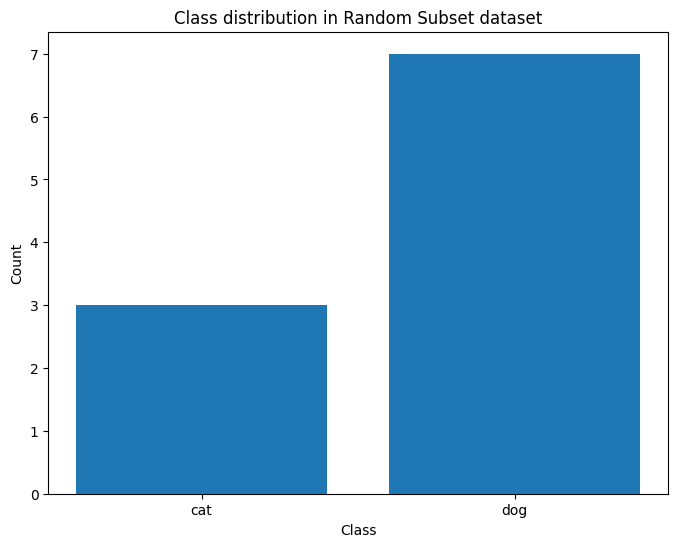

In [4]:
from pathlib import Path
data_folder = Path("/content/gdrive/MyDrive/experiment_small_data")

def get_filenames(data_folder):
    return [path for path in data_folder.glob("**/*.jpg")]


def load_images(filenames):
    return [img_to_array(load_img(path)) for path in filenames]

def get_labels(filenames):
    return np.array([int("dog" in str(path)) for path in filenames])


filenames = get_filenames(data_folder)


def get_random_subset(filenames, num_samples):
    return random.sample(filenames, num_samples)


random_filenames = get_random_subset(filenames, 10)

images = load_images(random_filenames)
y_labels = get_labels(random_filenames)


heights = [image.shape[0] for image in images]
widths = [image.shape[1] for image in images]


print("Heights:", heights)
print("Widths:", widths)

class_names = ["cat", "dog"]


def plot_class_distribution(labels, class_names, dataset_name):
    counts = np.bincount(labels)
    plt.figure(figsize=(8, 6))
    plt.bar(class_names, counts)
    plt.title(f'Class distribution in {dataset_name} dataset')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()


plot_class_distribution(y_labels, class_names, 'Random Subset')






# Plotting the widths and heights

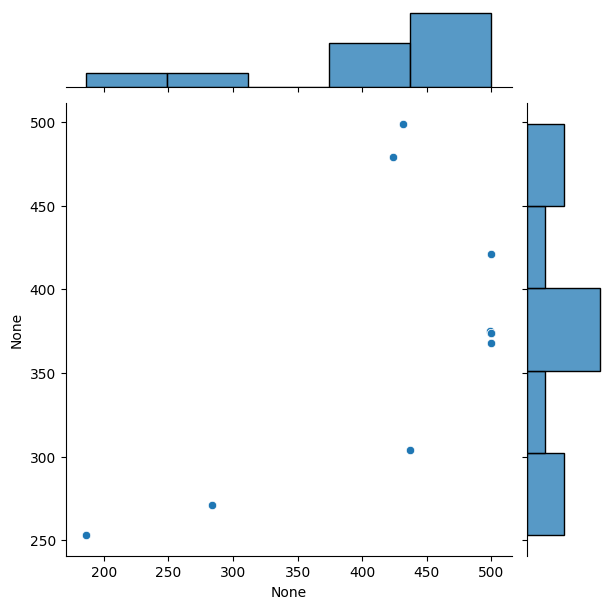

In [13]:
sns.jointplot(x=widths, y=heights)

# scanning the sizes of the files


In [ ]:
data_folder = Path("/content/gdrive/MyDrive/experiment_small_data")


def get_filenames(data_folder):
    return list(data_folder.glob("**/*.jpg"))


filenames = get_filenames(data_folder)
images = [img_to_array(load_img(path)) for path in filenames]


heights = [image.shape[0] for image in images]
widths = [image.shape[1] for image in images]


print(f"Average height: {np.mean(heights)}, Average width: {np.mean(widths)}")
print(f"Median height: {np.median(heights)}, Median width: {np.median(widths)}")
print(f"Min height: {np.min(heights)}, Min width: {np.min(widths)}")
print(f"Max height: {np.max(heights)}, Max width: {np.max(widths)}")

# setting the sizes of the files in the array to plot / just showing not using yet

In [7]:
target_height, target_width = 128, 128

In [8]:
import cv2


images_resized = np.array([cv2.resize(image, (target_width, target_height)) for image in images])


np.save("images_resized.npy", images_resized)


print(images_resized.shape)

(10, 128, 128, 3)


# Display of the newly scaled files

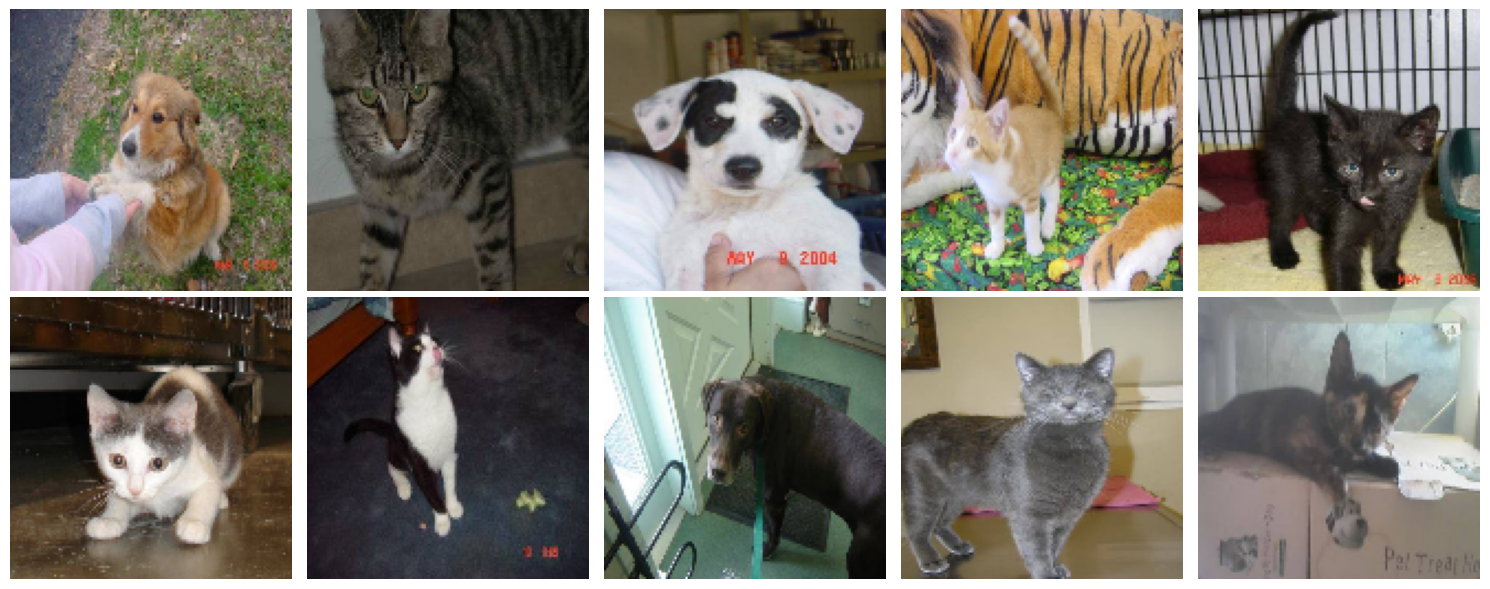

In [ ]:
import matplotlib.pyplot as plt


def plot_images(images, num_images=10):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(num_images):
        ax = axs[i // 5, i % 5]
        ax.imshow(images[i].astype('uint8'))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(images_resized)

# Making Model / Importing Model

# Data Augmentation ( this is very confusing to be honest but its basically making the model flip and change the positions in different places to read it better) i have to read about this more because this is chat gpt's solution

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)



# Resizing Images ( i know i did it again but this time i set the sizes for the function)

In [10]:
def load_images_from_folder(folder, target_size):
    folder_path = Path(folder)
    if not folder_path.exists():
        print(f"The folder {folder} does not exist.")
        return np.array([]), np.array([])

    images = []
    labels = []

    for class_folder in ['cat', 'dog']:
        class_path = folder_path / class_folder
        if not class_path.exists():
            print(f"The folder {class_path} does not exist.")
            continue

        for image_path in class_path.glob("*.jpg"):
            print(f"Loading image: {image_path}")
            image = cv2.imread(str(image_path))
            if image is None:
                print(f"Failed to load image: {image_path}")
                continue
            image_resized = cv2.resize(image, target_size) # changing the size i chose 128 so the model reads better lets see what happens
            images.append(image_resized)
            labels.append(0 if 'cat' in image_path.name.lower() else 1)

    return np.array(images), np.array(labels)

target_size = (128, 128)  # we're going with this size any more gave me shit accuracy

# Load small dataset
X_small_train, y_small_train = load_images_from_folder("/content/gdrive/MyDrive/experiment_small_data/train", target_size)
X_small_val, y_small_val = load_images_from_folder("/content/gdrive/MyDrive/experiment_small_data/val", target_size)
X_small_test, y_small_test = load_images_from_folder("/content/gdrive/MyDrive/experiment_small_data/test", target_size)

# Load tiny dataset
X_tiny_train, y_tiny_train = load_images_from_folder("/content/gdrive/MyDrive/experiment_tiny_data/train", target_size)
X_tiny_val, y_tiny_val = load_images_from_folder("/content/gdrive/MyDrive/experiment_tiny_data/val", target_size)
X_tiny_test, y_tiny_test = load_images_from_folder("/content/gdrive/MyDrive/experiment_tiny_data/test", target_size)

print(f'Number of small train dataset images: {len(X_small_train)}')
print(f'Number of small val dataset images: {len(X_small_val)}')
print(f'Number of small test dataset images: {len(X_small_test)}')

print(f'Number of tiny train dataset images: {len(X_tiny_train)}')
print(f'Number of tiny val dataset images: {len(X_tiny_val)}')
print(f'Number of tiny test dataset images: {len(X_tiny_test)}')


Streaming output truncated to the last 5000 lines.
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11765.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11732.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11751.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11729.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.118.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11797.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.1178.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11806.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.1179.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11815.jpg
Loading image: /content/gdrive/MyDrive/experiment_small_data/train/dog/dog.11786.jpg
Loading image: /co

# The model

In [11]:
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (cat vs dog)
    ])
    return model

# Model Compiling dimensions

In [12]:
input_shape = (128, 128, 3)
model = create_model(input_shape)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Normalize images to [0, 1] range and scaling it accordingly with augmentation in mind
X_small_train = X_small_train / 255.0
X_small_val = X_small_val / 255.0
X_small_test = X_small_test / 255.0
datagen.fit(X_tiny_train)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_small.h5', monitor='val_loss', save_best_only=True)

history = model.fit(datagen.flow(X_small_train, y_small_train, batch_size=64),  # reduced batch size because the model fucking crashed (still influenced accuracy greatly)
                    epochs=8, # this number gets the accuracy usually around 0,76
                    validation_data=(X_small_val, y_small_val),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/8
134/134 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.5460

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/134 [==============================] - 361s 3s/step - loss: 0.6865 - accuracy: 0.5460 - val_loss: 0.6556 - val_accuracy: 0.6121
Epoch 2/8
134/134 [==============================] - 349s 3s/step - loss: 0.6626 - accuracy: 0.5947 - val_loss: 0.6292 - val_accuracy: 0.6452
Epoch 3/8
134/134 [==============================] - 349s 3s/step - loss: 0.6445 - accuracy: 0.6217 - val_loss: 0.6175 - val_accuracy: 0.6581
Epoch 4/8
134/134 [==============================] - 346s 3s/step - loss: 0.6066 - accuracy: 0.6651 - val_loss: 0.5658 - val_accuracy: 0.7083
Epoch 5/8
134/134 [==============================] - 345s 3s/step - loss: 0.5732 - accuracy: 0.7024 - val_loss: 0.5388 - val_accuracy: 0.7457
Epoch 6/8
134/134 [==============================] - 356s 3s/step - loss: 0.5396 - accuracy: 0.7299 - val_loss: 0.5249 - val_accuracy: 0.7451
Epoch 7/8
134/134 [==============================] - 347s 3s/step - loss: 0.5239 - accuracy: 0.7414 - val_loss: 0.4984 - val_accuracy: 0.7580
Epoch 8/8
134/13

# Model Evaluation

7/7 [==============================] - 4s 489ms/step - loss: 32.0694 - accuracy: 0.7739
Small Dataset Test Accuracy: 77.39%


NameError: name 'history' is not defined

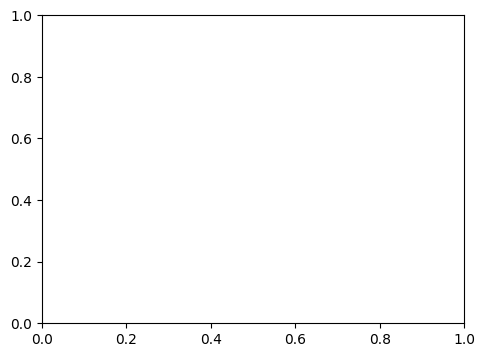

In [13]:
test_loss, test_acc = model.evaluate(X_tiny_test, y_tiny_test)
print(f'Small Dataset Test Accuracy: {test_acc * 100:.2f}%')



plt.figure(figsize=(12, 4))

# validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()